In [3]:
import numpy as np
import matplotlib.pyplot as plt

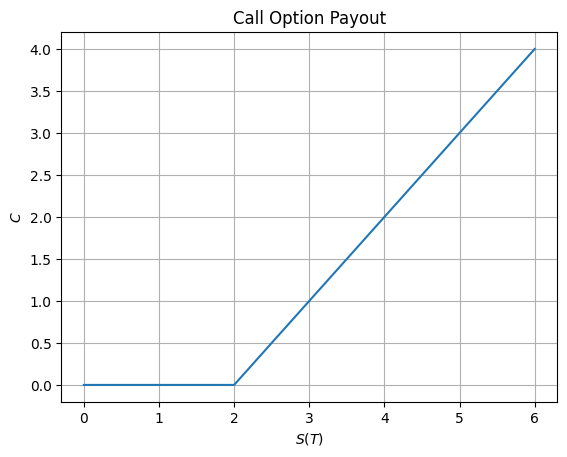

In [4]:
from payout import compute_call_option_payout

S = np.linspace(0, 6, 100)
E = 2
C = compute_call_option_payout(S, E)

plt.figure()
plt.plot(S, C)
plt.xlabel(r'$S(T)$')
plt.ylabel(r'$C$')
plt.title('Call Option Payout')
plt.grid()

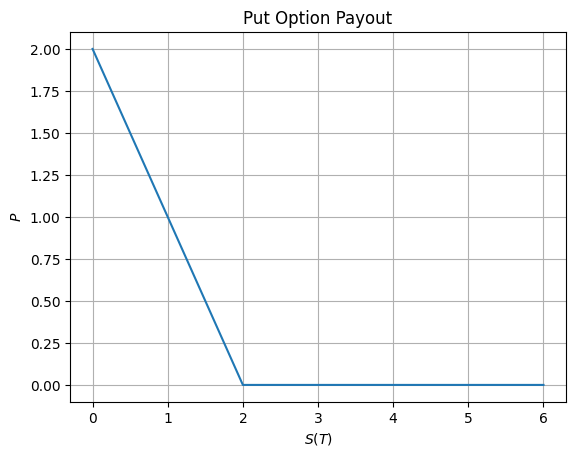

In [5]:
from payout import compute_put_option_payout

S = np.linspace(0, 6, 100)
E = 2
P = compute_put_option_payout(S, E)

plt.figure()
plt.plot(S, P)
plt.xlabel(r'$S(T)$')
plt.ylabel(r'$P$')
plt.title('Put Option Payout')
plt.grid()

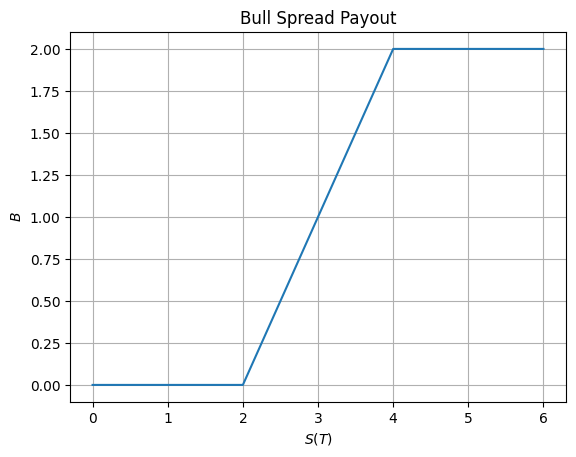

In [6]:
from payout import compute_bull_spread_payout

S = np.linspace(0, 6, 100)
E1 = 2
E2 = 4
B = compute_bull_spread_payout(S, E1, E2)

plt.figure()
plt.plot(S, B)
plt.xlabel(r'$S(T)$')
plt.ylabel(r'$B$')
plt.title('Bull Spread Payout')
plt.grid()

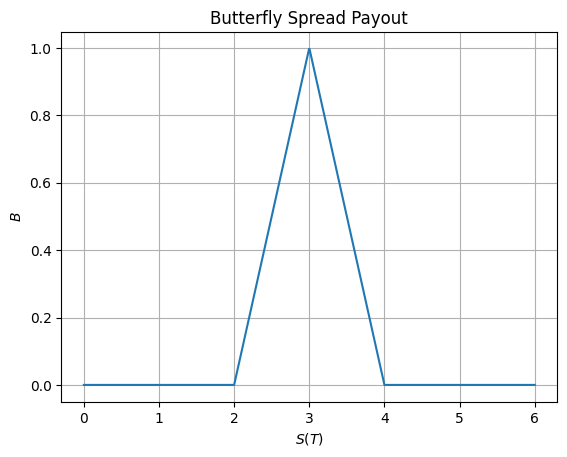

In [7]:
from payout import compute_butterfly_spread_payout

S = np.linspace(0, 6, 1000)
E1 = 2
E2 = 3
E3 = 4

B = compute_butterfly_spread_payout(S, E1, E2, E3)

plt.figure()
plt.plot(S, B)
plt.xlabel(r'$S(T)$')
plt.ylabel(r'$B$')
plt.title('Butterfly Spread Payout')
plt.grid()